<a href="https://colab.research.google.com/github/pavanrj3/power-bi1/blob/main/data_analysing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Salary Data.csv')

print(df)


      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [ ]:
df['Gender'] = df['Gender'].fillna(df.mode()['Gender'][0])
df['Education Level'] = df['Education Level'].fillna(df.mode()['Education Level'][0])
df['Job Title'] = df['Job Title'].fillna(df.mode()['Job Title'][0])

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())


In [ ]:
df = pd.get_dummies(df,columns=['Gender', 'Education Level', 'Job Title'])

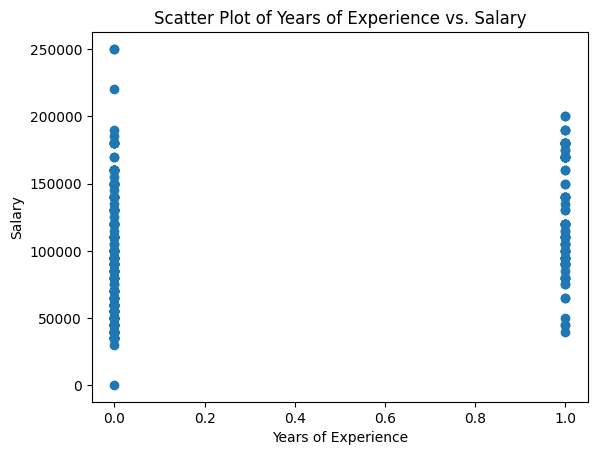

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["Education Level_Master's"], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot of Years of Experience vs. Salary')
plt.show()

In [ ]:
target = df['Salary']
data = df.drop('Salary', axis=1)
categorical_cols = ['Gender', 'Education Level', 'Job Title']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print(data)

      Age  Years of Experience  Gender_Male  Education Level_Master's  \
0    32.0                  5.0         True                     False   
1    28.0                  3.0        False                      True   
2    45.0                 15.0         True                     False   
3    36.0                  7.0        False                     False   
4    52.0                 20.0         True                      True   
..    ...                  ...          ...                       ...   
370  35.0                  8.0        False                     False   
371  43.0                 19.0         True                      True   
372  29.0                  2.0        False                     False   
373  34.0                  7.0         True                     False   
374  44.0                 15.0        False                     False   

     Education Level_PhD  Job Title_Accountant  \
0                  False                 False   
1                  Fals

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
d = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", d)

Mean Squared Error: 356703116.02121747


Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 0
dtype: int64
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


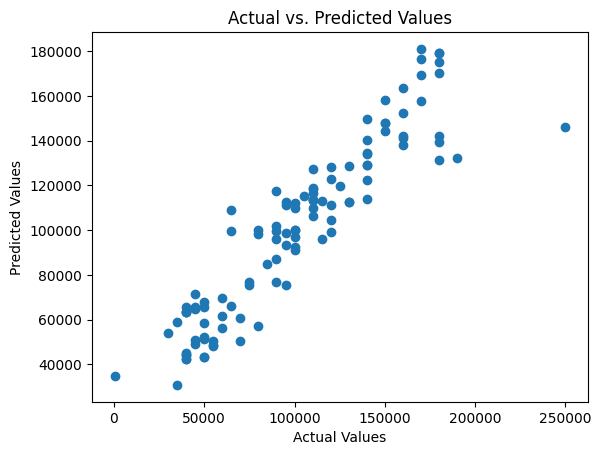

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.show()

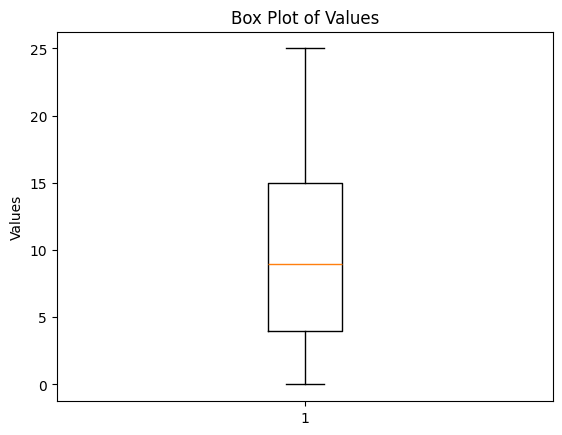

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['Years of Experience'])
plt.ylabel("Values")
plt.title("Box Plot of Values")

plt.show()

In [ ]:
l=['type_1','type_3','type_4']
max=0
for i in l:
  a = i[-1]
  a=int(a)
  if(a>max):
    max=a
    t=i
print(t)

type_4


In [ ]:
a = [[10,20], [30,40], [50,60], [20,10], [40,30], [90, 100], [1, 9], [100, 90]]
for i in a:
  l=i[::-1]
  if(l in a):
    print(i)
    a.remove(l)



[10, 20]
[30, 40]
[90, 100]


In [ ]:
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, confusion_matrix
        # Example: Load a dataset (replace 'your_dataset.csv' with your actual file)
    df = pd.read_csv('/content/churn-bigml-20.csv')

    # Define features (X) and target (y)
    df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
    df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

    X = df[['Account length', 'Area code', 'International plan']] # Replace with your feature columns
    df['Churn'] = df['Churn'].map({True: 1, False: 0})
    y = df['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression(random_state=42) # Set random_state for reproducibility
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(df['Churn'])

Accuracy: 0.8606965174129353
Confusion Matrix:
[[173   0]
 [ 28   0]]
0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64


In [ ]:
print(df)

    State  Account length  Area code  International plan  Voice mail plan  \
0      LA             117        408                   0                0   
1      IN              65        415                   0                0   
2      NY             161        415                   0                0   
3      SC             111        415                   0                0   
4      HI              49        510                   0                0   
..    ...             ...        ...                 ...              ...   
662    WI             114        415                   0                1   
663    AL             106        408                   0                1   
664    VT              60        415                   0                0   
665    WV             159        415                   0                0   
666    CT             184        510                   1                0   

     Number vmail messages  Total day minutes  Total day calls  \
0        

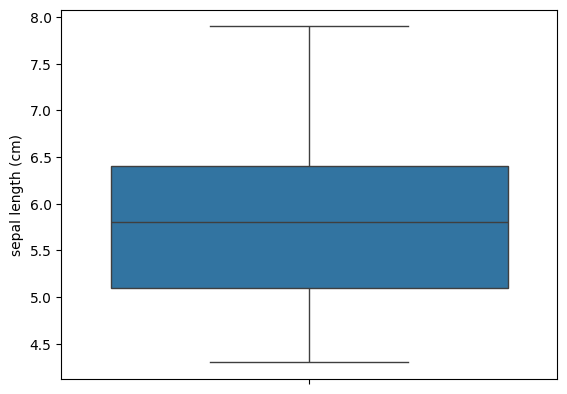

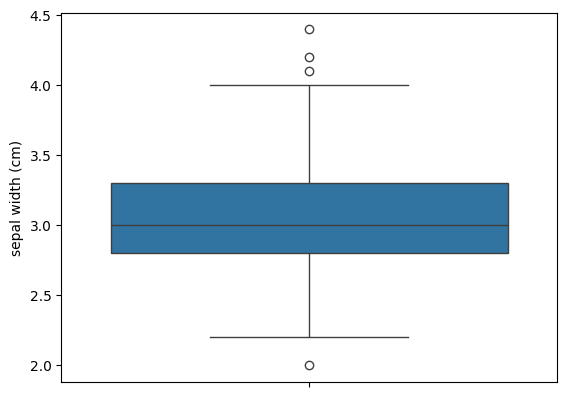

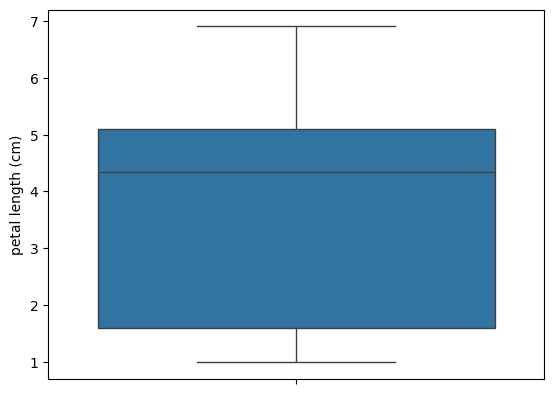

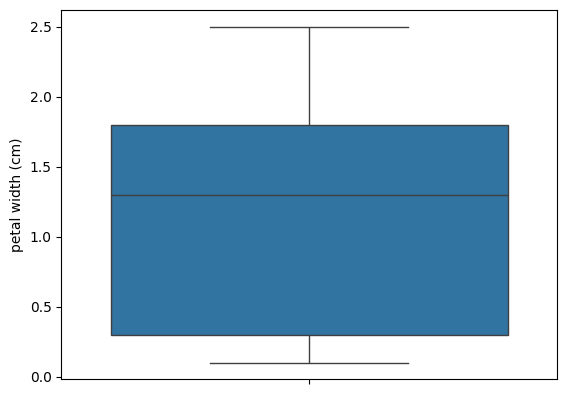

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                                          'petal width (cm)', 'Species'])


cols = df.columns[0:-1]
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()
df.head()


In [ ]:
# Splitting the data into train and test sets
X = df.drop("Species",axis=1)
y = df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)
# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X, y)
# Defining an object for DTC and fitting for train dataset
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus


features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))
print(classification_report(y_test,y_pred))
dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9555555555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix - Train: 
 [[36  0  0]
 [ 0 32  0]
 [ 0  0 37]]

 Confusion Matrix - Test: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from XGBoost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#factorial code
a=int(input())
f=1
for i in range(1,a+1):
  f=f*i
print(f)

In [ ]:
#fibonacci series
a=int(input())
n1=0
n2=1
while(n1<a):
  print(n1)
  n3=n1+n2
  n1=n2
  n2=n3